In [ ]:
import tensorflow
# from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import models,layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
from keras.preprocessing.image import ImageDataGenerator, load_img

In [ ]:
train_dir = '/content/drive/MyDrive/CNN/Dataset/train_images'
validation_dir = '/content/drive/MyDrive/CNN/Dataset/test_images'
image_size = 224

# Train last 4 layers with data augmentation


## Build model

In [17]:
from keras.applications import VGG16

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
# for layer in vgg_conv.layers:
#     print(layer, layer.trainable)


from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

#Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              25691136  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                10250     
Total params: 40,416,074
Trainable params: 32,780,810
Non-trainable params: 7,635,264
_________________________________________________________________


## Training step
Train the model. Here we will be using the imageDataGenerator for data augmentation.

In [19]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
      )


validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 32
val_batchsize = 32

#parameters
eps = 1#40

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

cnn = models.Sequential([
     layers.Conv2D(filters =32, kernel_size=(3,3),activation = 'relu',input_shape = (224,224,3)),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(filters =64, kernel_size=(3,3),activation = 'relu'),
     layers.MaxPooling2D((2,2)),
     # dense layer
     layers.Flatten(),
     layers.Dense(64,activation = 'relu'),
     layers.Dense(10,activation = 'softmax')
     ])
# Compile the model
cnn.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])
# cnn.compile(optimizer ='adam',
#             loss = 'sparse_categorical_crossentropy',
#             metrics=['accuracy'])
history = cnn.fit(train_generator,
                              epochs=50,
                              verbose=1,
                              validation_data=validation_generator)

model.save('trained_last4_layers_model.h5')

Found 2408 images belonging to 10 classes.
Found 604 images belonging to 10 classes.
Epoch 1/50
76/76 [==============================] - 281s 4s/step - loss: 3.0628 - accuracy: 0.3350 - val_loss: 1.2362 - val_accuracy: 0.6705
Epoch 2/50
76/76 [==============================] - 170s 2s/step - loss: 1.2312 - accuracy: 0.6380 - val_loss: 1.4036 - val_accuracy: 0.6209
Epoch 3/50
76/76 [==============================] - 168s 2s/step - loss: 0.9822 - accuracy: 0.6987 - val_loss: 0.5644 - val_accuracy: 0.8146
Epoch 4/50
76/76 [==============================] - 167s 2s/step - loss: 0.7622 - accuracy: 0.7584 - val_loss: 0.5710 - val_accuracy: 0.8146
Epoch 5/50
76/76 [==============================] - 167s 2s/step - loss: 0.6200 - accuracy: 0.8068 - val_loss: 0.4639 - val_accuracy: 0.8560
Epoch 6/50
76/76 [==============================] - 166s 2s/step - loss: 0.5259 - accuracy: 0.8338 - val_loss: 0.5823 - val_accuracy: 0.8063
Epoch 7/50
76/76 [==============================] - 166s 2s/step - lo

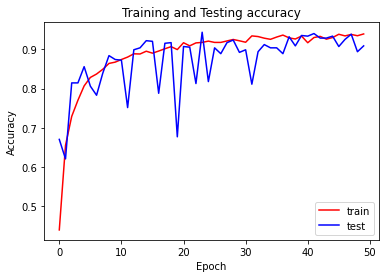

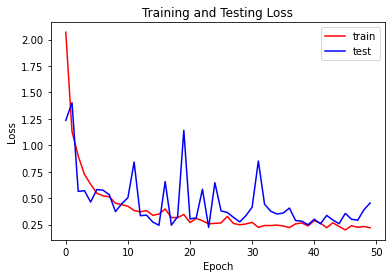

<Figure size 432x288 with 0 Axes>

In [20]:
# Plot the accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(0,50)

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Testing accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.legend(['train', 'test'], loc='upper right')
plt.title('Training and Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.figure()

plt.show()

## Validation of the trained model
Show the errors

Found 604 images belonging to 10 classes.
<class 'dict'>
{0: 'airplanes', 1: 'bonsai', 2: 'butterfly', 3: 'car_side', 4: 'faces', 5: 'ketch', 6: 'leopards', 7: 'motorbikes', 8: 'scorpion', 9: 'watch'}
19/19 [==============================] - 10s 529ms/step
No of errors = 55/604


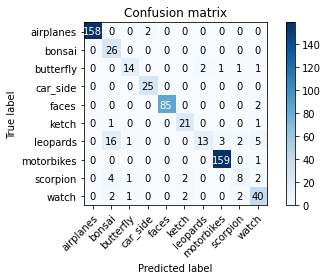

In [23]:
# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Get the filenames from the generator
fnames = validation_generator.filenames

# Get the ground truth from generator
# ground_truth = validation_generator.classes

ground_truth = validation_generator.classes
label2index = validation_generator.class_indices
idx2label = dict((v,k) for k,v in label2index.items())
# # Get the label to class mapping from the generator
# print("idx2label")
print(type(idx2label))
print(idx2label)
# Get the predictions from the model using the generator
predictions = cnn.predict(validation_generator,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))

from sklearn.metrics import confusion_matrix
def PlotConfusionMatrix(ground_truth, predicted_classes):
    np.set_printoptions(precision=2)
    classes = ['airplanes','bonsai','butterfly','car_side','faces','ketch','leopards','motorbikes','scorpion','watch']
    title='Confusion matrix'
    cmap=plt.cm.Blues
    cm = confusion_matrix(ground_truth,predicted_classes)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
    fmt ='d' 
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j],fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()    
    plt.show()
PlotConfusionMatrix(ground_truth, predicted_classes)

In [16]:
print("Training and validation done.")

Training and validation done.
